<a href="https://colab.research.google.com/github/nataliavlrom/progects/blob/main/terver_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсовой проект 

**Линейная регрессия (условия применимости метода проверить ,можно с графиками, построить модель, исследовать на статистическую значимость модель ,можно и коэффициенты (самостоятельное изучение), коэффициент детерминации)**







**Условия применения линейного регрессионного анализа:**

1. Линейная взаимосвязь независимой (x) и зависимой переменной (y)
2. Нормальное распределение остатков
3. Гомоскедастичность - постоянная изменчивость остатков на всех уровнях независимой переменной

**Настройка среды. Загрузка данных**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import files

In [123]:
files.upload()

Saving states.csv to states (2).csv


{'states.csv': b'"state","metro_res","white","hs_grad","poverty","female_house"\n"Alabama",55.4,71.3,79.9,14.6,14.2\n"Alaska",65.6,70.8,90.6,8.3,10.8\n"Arizona",88.2,87.7,83.8,13.3,11.1\n"Arkansas",52.5,81,80.9,18,12.1\n"California",94.4,77.5,81.1,12.8,12.6\n"Colorado",84.5,90.2,88.7,9.4,9.6\n"Connecticut",87.7,85.4,87.5,7.8,12.1\n"Delaware",80.1,76.3,88.7,8.1,13.1\n"District  of Columbia",100,36.2,86,16.8,18.9\n"Florida",89.3,80.6,84.7,12.1,12\n"Georgia",71.6,67.5,85.1,12.1,14.5\n"Hawaii",91.5,25.9,88.5,10.6,12.4\n"Idaho",66.4,95.5,88.2,11.8,8.7\n"Illinois",87.8,79.5,85.9,11.2,12.3\n"Indiana",70.8,88.9,86.4,8.7,11.1\n"Iowa",61.1,94.9,89.7,8.3,8.6\n"Kansas",71.4,89.3,88.6,9.4,9.3\n"Kentucky",55.8,90.3,82.8,13.1,11.8\n"Louisiana",72.6,64.2,79.8,17,16.6\n"Maine",40.2,97.1,86.6,11.3,9.5\n"Maryland",86.1,65.6,87.6,7.3,14.1\n"Massachusetts",91.4,87.2,87.1,9.6,11.9\n"Michigan",74.7,81.5,87.6,10.3,12.5\n"Minnesota",70.9,90.2,91.6,6.5,8.9\n"Mississippi",48.8,61.2,81.2,17.6,17.3\n"Missouri",69.

**Описание данных:**
1. state - название штатов в США
2. mertro_res - % начеления, которое проживает в столичной области
3. white - % белокожих
4. hs_grad - % людей, имеющих среднее образование
5. poverty - % людей, проживающих в бедности
6. femail_house - % семей, где женщина домохозяйка

In [124]:
df = pd.read_csv('states.csv')
df

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


In [125]:
df.shape

(51, 6)

# Описательная статистика 

In [126]:
df.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


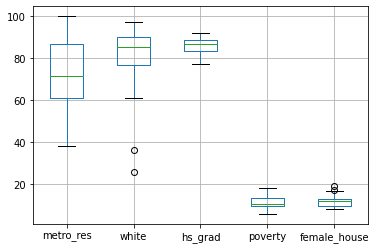

In [127]:
df.boxplot()

In [128]:
corelation = df.corr()

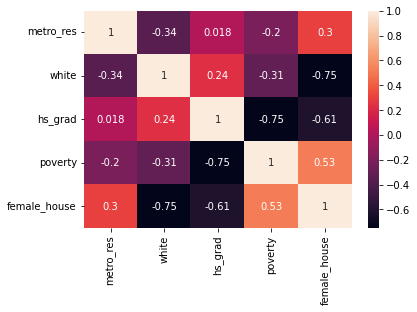

In [129]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

*В таблице представлены коэффициенты корреляции Пирсона между количественными переменными*

Выявлена сильная корреляционная взаимосвязь между несколькими переменными.

Далее будет выполнен линейный регрессионный анализ между уровнем образования - независимая переменная и уровнем бедности - зависимая переменная.

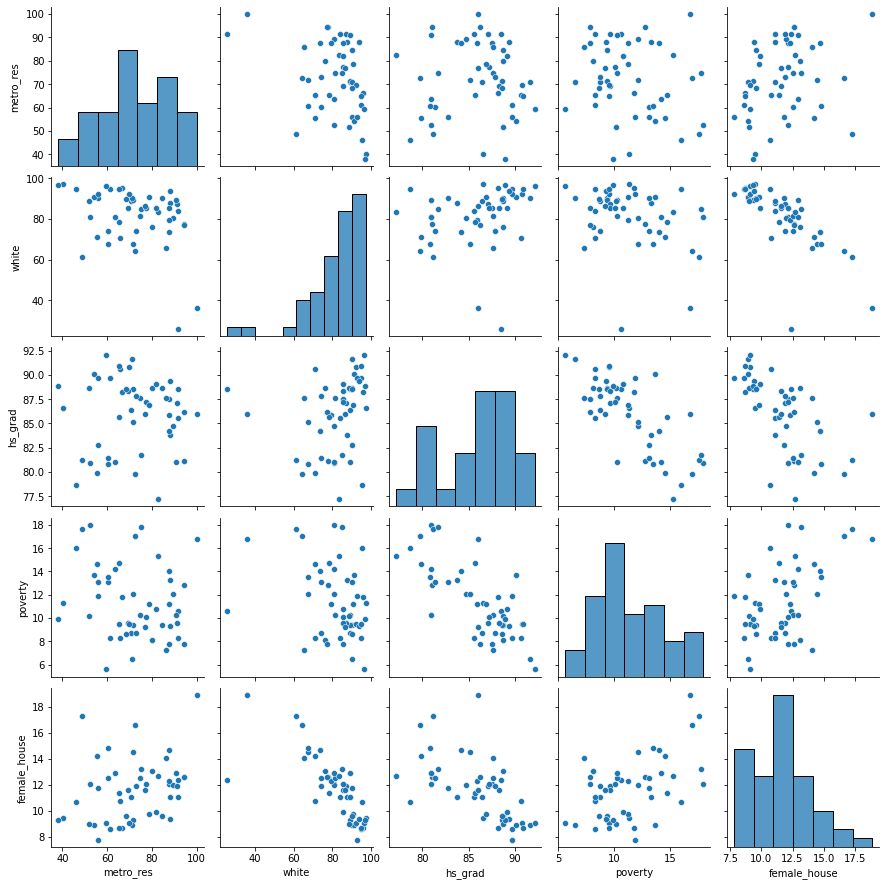

In [130]:
sns.pairplot(df)

*В сводной таблице представлены диаграммы рассеяния между парами количественных переменных. На диагонали таблицы представлен характер распределения каждой переменной*

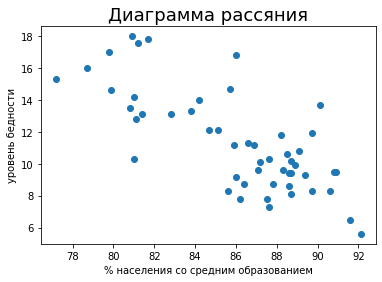

In [131]:
plt.scatter(df['hs_grad'], df['poverty'])
plt.xlabel('% населения со средним образованием')
plt.ylabel('уровень бедности')
plt.title("Диаграмма рассяния",fontsize=18)
plt.show()

*Диаграмма рассеяния для двух переменных:*

x - процент населения со средним образованием

y - уровень бедности

Прослеживается линейная зависимость переменных

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


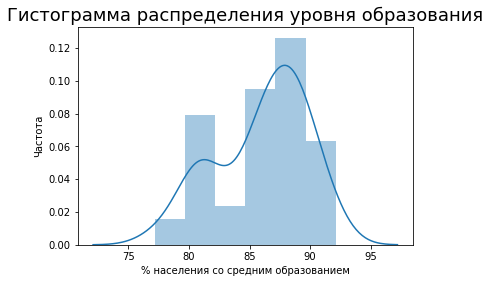

In [135]:
sns.distplot(df['hs_grad'])
plt.xlabel('% населения со средним образованием')
plt.ylabel('Частота')
plt.title("Гистограмма распределения уровня образования",fontsize=18)
plt.show()

Гистограмма распределения уровня образования

*Отсутствуют значимые выбросы*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


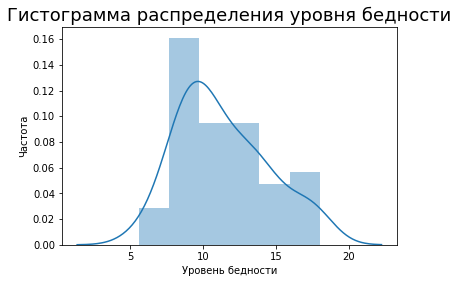

In [137]:
sns.distplot(df['poverty'])
plt.xlabel('Уровень бедности')
plt.ylabel('Частота')
plt.title("Гистограмма распределения уровня бедности",fontsize=18)
plt.show()

Гистограмма распределения уровня бедности

*Отсутствуют значимые выбросы*

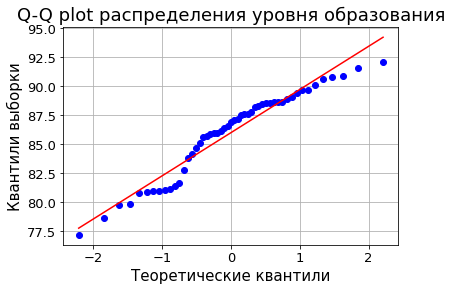

In [138]:
stats.probplot(df['hs_grad'], dist="norm", plot=pylab)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Теоретические квантили",fontsize=15)
plt.ylabel("Квантили выборки",fontsize=15)
plt.title("Q-Q plot распределения уровня образования",fontsize=18)
plt.grid(True)
plt.show()

*QQ plot для уровня образования*

Данные выборки близки к нормальному распределению

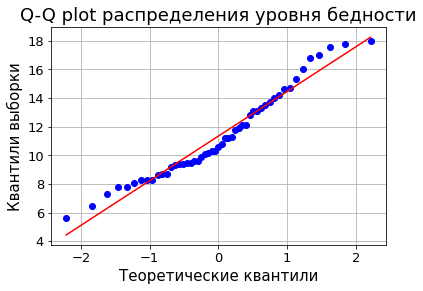

In [139]:
stats.probplot(df['poverty'], dist="norm", plot=pylab)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Теоретические квантили",fontsize=15)
plt.ylabel("Квантили выборки",fontsize=15)
plt.title("Q-Q plot распределения уровня бедности",fontsize=18)
plt.grid(True)
plt.show()

*QQ plot уровня бедности*

Данные выборки близки к нормальному распределению

**Таким образом, учитывая нормальное распределение случайных величин - уровень образования (x) и уровень бедности (y), отсутствие значимых выбросов и линейную взаимосвязь переменных, возможно применение линейного регрессионного анализа.**

# Регрессионный анализ

**Регрессионный анализ с одной независимой переменной:**
1. уровень образования - независимая переменная (x)
2. прожиавние в бедности - зависимая переменная (y)

**Задачи:**

1. Построить регрессиионная модель: y_hat = b0 + b1*x

2. Найти коэффициент детерминации R2

3. Проверить гипотезу:

Нулевая гипотеза. H0: b1 = 0

Альтернативная гипотеза. Н1: b1 != 0

pvalue - 5%

In [149]:
x = np.array(df['hs_grad'])
x

array([79.9, 90.6, 83.8, 80.9, 81.1, 88.7, 87.5, 88.7, 86. , 84.7, 85.1,
       88.5, 88.2, 85.9, 86.4, 89.7, 88.6, 82.8, 79.8, 86.6, 87.6, 87.1,
       87.6, 91.6, 81.2, 88.3, 90.1, 90.8, 85.6, 92.1, 86.2, 81.7, 84.2,
       81.4, 89.7, 87.2, 85.7, 86.9, 86. , 81. , 80.8, 88.7, 81. , 77.2,
       89.4, 88.9, 87.8, 89.1, 78.7, 88.6, 90.9])

In [150]:
y = np.array(df['poverty'])
y

array([14.6,  8.3, 13.3, 18. , 12.8,  9.4,  7.8,  8.1, 16.8, 12.1, 12.1,
       10.6, 11.8, 11.2,  8.7,  8.3,  9.4, 13.1, 17. , 11.3,  7.3,  9.6,
       10.3,  6.5, 17.6,  9.6, 13.7,  9.5,  8.3,  5.6,  7.8, 17.8, 14. ,
       13.1, 11.9, 10.1, 14.7, 11.2,  9.2, 10.3, 13.5, 10.2, 14.2, 15.3,
        9.3,  9.9,  8.7, 10.8, 16. ,  8.6,  9.5])

In [82]:
def mse_(b1, y=y, x=x, n = 51):
  return np.sum((b0 + b1 * x - y)**2) / n

In [83]:
b0 = 0.1

In [84]:
b1 = 0.1

In [85]:
n = 51

In [86]:
alfa = 6e-5

In [87]:
for i in range(10000000):
  b0 -= alfa*(2/n)*np.sum(b0 + b1*x - y)
  b1 -=alfa*(2/n) * np.sum((b0 + b1*x - y) * x)
  if i%1000000==0:
    print(f'iteration:{i}, b0={b0} b1={b1},mse={mse_(b1)}')

iteration:0, b0=0.10031774117647059 b1=0.1261482357566007,mse=11.925227050607349
iteration:1000000, b0=12.892587257993474 b1=-0.019053845359326315,mse=9.108426448221664
iteration:2000000, b0=23.154830635800916 b1=-0.1381468316349004,mse=7.3460757827301535
iteration:3000000, b0=31.38745500902128 b1=-0.2336861582125717,mse=6.211889716400281
iteration:4000000, b0=37.99186903189464 b1=-0.3103301589078965,mse=5.481967994097699
iteration:5000000, b0=43.29009261263135 b1=-0.37181586383184373,mse=5.012216392922204
iteration:6000000, b0=47.5404580522076 b1=-0.42114121057389087,mse=4.709901007498645
iteration:7000000, b0=50.95020588459521 b1=-0.4607112185006047,mse=4.515341601985205
iteration:8000000, b0=53.68558957001703 b1=-0.4924552533780907,mse=4.390130103996788
iteration:9000000, b0=55.87998172870125 b1=-0.5179210999397266,mse=4.309548447267599


In [88]:
alfa = 7e-5

In [89]:
for i in range(10000000):
  b0 -= alfa*(2/n)*np.sum(b0 + b1*x - y)
  b1 -=alfa*(2/n) * np.sum((b0 + b1*x - y) * x)
  if i%1000000==0:
    print(f'iteration:{i}, b0={b0} b1={b1},mse={mse_(b1)}')

iteration:0, b0=57.64037742350427 b1=-0.5383504354184073,mse=4.257688958588649
iteration:1000000, b0=59.25921134539584 b1=-0.5571369473621051,mse=4.220045687157841
iteration:2000000, b0=60.51104143798251 b1=-0.5716643925874462,mse=4.19753578841832
iteration:3000000, b0=61.479070683922416 b1=-0.5828983387357303,mse=4.184075333946488
iteration:4000000, b0=62.227639220936446 b1=-0.5915854508951882,mse=4.176026260217399
iteration:5000000, b0=62.8065007139682 b1=-0.5983031186385012,mse=4.171213080392645
iteration:6000000, b0=63.254129236339224 b1=-0.6034978322650193,mse=4.1683348982806026
iteration:7000000, b0=63.60027645195765 b1=-0.6075148588124561,mse=4.166613804830585
iteration:8000000, b0=63.867949061923454 b1=-0.6106211902568196,mse=4.165584626499153
iteration:9000000, b0=64.07493794669118 b1=-0.6130232891546853,mse=4.1649691991161175


In [90]:
alfa = 8e-5

In [91]:
for i in range(10000000):
  b0 -= alfa*(2/n)*np.sum(b0 + b1*x - y)
  b1 -=alfa*(2/n) * np.sum((b0 + b1*x - y) * x)
  if i%1000000==0:
    print(f'iteration:{i}, b0={b0} b1={b1},mse={mse_(b1)}')

iteration:0, b0=64.23500065833811 b1=-0.6148808117013118,mse=4.164601186213396
iteration:1000000, b0=64.37400322047228 b1=-0.6164939315577834,mse=4.164357935716351
iteration:2000000, b0=64.47761576983004 b1=-0.6176963515899273,mse=4.164222780489847
iteration:3000000, b0=64.55484859359605 b1=-0.6185926358239406,mse=4.164147685328797
iteration:4000000, b0=64.61241796240292 b1=-0.6192607263469548,mse=4.164105960836458
iteration:5000000, b0=64.65533018629067 b1=-0.6197587212128887,mse=4.1640827778079235
iteration:6000000, b0=64.68731697018656 b1=-0.6201299267276518,mse=4.164069896816886
iteration:7000000, b0=64.71115992800556 b1=-0.6204066234239963,mse=4.164062739860236
iteration:8000000, b0=64.72893247554634 b1=-0.6206128732201622,mse=4.164058763300651
iteration:9000000, b0=64.7421801375385 b1=-0.6207666118768903,mse=4.164056553838309


In [92]:
 alfa = 9e-5

In [93]:
for i in range(10000000):
  b0 -= alfa*(2/n)*np.sum(b0 + b1*x - y)
  b1 -=alfa*(2/n) * np.sum((b0 + b1*x - y) * x)
  if i%1000000==0:
    print(f'iteration:{i}, b0={b0} b1={b1},mse={mse_(b1)}')

iteration:0, b0=64.75205494961723 b1=-0.620881208744105,mse=4.164055326213233
iteration:1000000, b0=64.76019293389079 b1=-0.6209756497610137,mse=4.16405458370479
iteration:2000000, b0=64.76604019147824 b1=-0.6210435069794837,mse=4.164054200375365
iteration:3000000, b0=64.77024152932023 b1=-0.6210922633572467,mse=4.1640540024766795
iteration:4000000, b0=64.77326025038587 b1=-0.6211272955089499,mse=4.164053900308967
iteration:5000000, b0=64.77542924445805 b1=-0.6211524666088055,mse=4.1640538475635855
iteration:6000000, b0=64.77698769758707 b1=-0.621170552402508,mse=4.164053820333112
iteration:7000000, b0=64.77810746835183 b1=-0.6211835473028153,mse=4.164053806275034
iteration:8000000, b0=64.77891203959258 b1=-0.6211928843237421,mse=4.164053799017373
iteration:9000000, b0=64.77949013548672 b1=-0.6211995931062438,mse=4.164053795270514


In [147]:
b0 = 64.78

In [148]:
b1 = -0.62

In [151]:
y_hat = b0 + b1*x
y_hat

array([15.242,  8.608, 12.824, 14.622, 14.498,  9.786, 10.53 ,  9.786,
       11.46 , 12.266, 12.018,  9.91 , 10.096, 11.522, 11.212,  9.166,
        9.848, 13.444, 15.304, 11.088, 10.468, 10.778, 10.468,  7.988,
       14.436, 10.034,  8.918,  8.484, 11.708,  7.678, 11.336, 14.126,
       12.576, 14.312,  9.166, 10.716, 11.646, 10.902, 11.46 , 14.56 ,
       14.684,  9.786, 14.56 , 16.916,  9.352,  9.662, 10.344,  9.538,
       15.986,  9.848,  8.422])

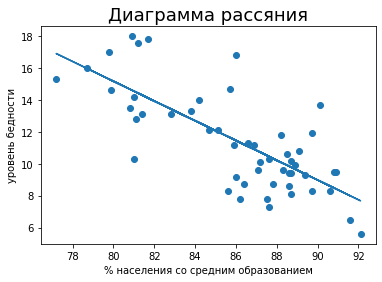

In [152]:
plt.scatter(df['hs_grad'], df['poverty'])
plt.plot(x, b0+b1*x)
plt.xlabel('% населения со средним образованием')
plt.ylabel('уровень бедности')
plt.title("Диаграмма рассяния",fontsize=18)
plt.show()

In [153]:
x = x.reshape((-1, 1))


In [154]:
model = LinearRegression()

In [155]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
model = LinearRegression().fit(x, y)


In [158]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5577972503105937


In [159]:
print('intercept:', model.intercept_)

intercept: 64.7809657701021


In [160]:
print('slope:', model.coef_)

slope: [-0.62121672]


In [161]:
x = sm.add_constant(x)

In [162]:
model = sm.OLS(y, x)

In [163]:
results = model.fit()

In [164]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           3.11e-10
Time:                        20:17:46   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7810      6.803      9.523      0.0

**Вывод:**

1. Регрессионная модель: y_hat = b0 + b1*x
(b0 = 64.78 ; b1 = -0.62; y_hat = 64.78 - 0.62*x)

2. Результаты t-теста(H0: b1 = 0; H1: b1 != 0)

b1 = -0.62, ст.ошибка 0,079, t = -7.862, pvalue < 0.05

Полученные данные позволяют отвергнуть нулевую гипотезу.

Таким образом, при увеличении уровня образования на 1% - уровень бедности снижается на 0,62%

3. Коэффициент детерминации(R**2) = 0,558

То есть 55,8% изменчвости зависимой переменной объясняется полученной моделью (в нашем случае влиянием независимой переменной - уровень образования, которя является предиктором)

# Aнализ остатков

In [165]:
residuals = results.resid
residuals

array([-0.54575002, -0.19873114,  0.57699518,  3.4754667 , -1.60028996,
       -0.2790429 , -2.62450296, -1.5790429 ,  5.44367196, -0.06390977,
        0.18457691,  0.79671375,  1.81034874, -0.21844971, -2.40784135,
       -0.75782618, -0.34116457, -0.24422154,  1.79212831,  0.31640199,
       -3.06238129, -1.07298965, -0.06238129, -1.37751442,  3.26183171,
       -0.32752959,  4.8906605 ,  1.12551221, -3.30481473, -1.96690606,
       -3.4320847 ,  3.77244007,  1.52548187, -1.11392494,  2.84217382,
       -0.51086798,  3.15730694,  0.40276701, -2.15632804, -4.16241163,
       -1.08665497,  0.5209571 , -0.26241163, -1.52303516,  0.0558088 ,
        0.34520044, -1.53813795,  1.36944379,  0.10878992, -1.14116457,
        1.18763388])

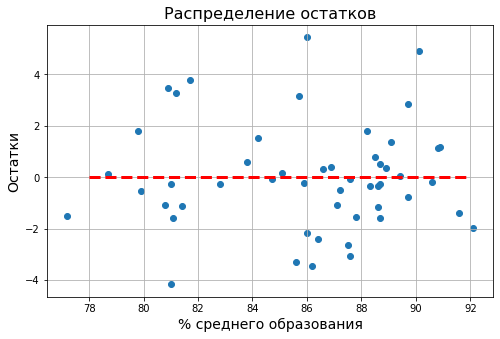

In [166]:
plt.figure(figsize=(8,5))
plt.title("Распределение остатков",fontsize=16)
plt.scatter(df['hs_grad'], residuals)
plt.grid(True)
n = np.linspace(78, 92, 100)
plt.plot(n, 0*n, color='red',linestyle='--',lw=3)
plt.xlabel('% среднего образования',fontsize=14)
plt.ylabel('Остатки',fontsize=14)
plt.show()

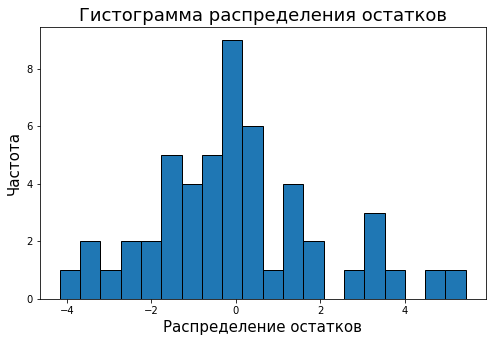

In [167]:
plt.figure(figsize=(8,5))
plt.hist(residuals,bins=20,edgecolor='k')
plt.ylabel('Частота',fontsize=15)
plt.xlabel('Распределение остатков',fontsize=15)
plt.title("Гистограмма распределения остатков",fontsize=18)
plt.show()

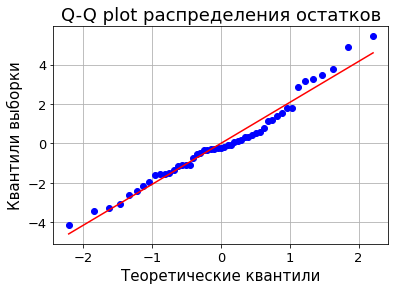

In [168]:
stats.probplot(residuals, dist="norm", plot=pylab)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Теоретические квантили",fontsize=15)
plt.ylabel("Квантили выборки",fontsize=15)
plt.title("Q-Q plot распределения остатков",fontsize=18)
plt.grid(True)
plt.show()

In [169]:
stats.shapiro(residuals)

(0.9680377244949341, 0.1831192970275879)

Тест Шапиро-Уилка распределения остатков: р > 0.05 

Таким образом, распределение остактов является нормальным

**Вывод по анализу остатков:**

1. Взаимосвязь переменных x и y является линейной
2. Распределение остатков является нормальным
3. Изменчивость остатков на всех уровнях независимой переменной является постоянной (гомоскедастичность)

**Учитывая вышесказанное, примененние для анализа данных линейной регресии является оправданным**

#Задача предсказания значений зависимой переменной

Например: определить уровень бедности в штате с уровнем образования - 95% 

Ответ: 5,88%

In [170]:
y_hat95 = b0 + b1*95
y_hat95

5.880000000000003